# (1) Description of each column in fish.csv
This set of data features 3 columns. Age_of_fish describes the age of the fish in days, Temperature describes the temperature of the water in celsius, and Length_of_fish describes exactly that with unit unknown.

Reference:
1. https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html
2. https://people.sc.fsu.edu/~jburkardt/datasets/regression/x06.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

df = pd.read_csv('/content/fish.csv')
df.head() # Default n = 5

,Age_of_fish,Temperature,Length_of_fish
0,14,25,620
1,28,25,1315
2,41,25,2120
3,55,25,2600
4,69,25,3110


# (2) Can Linear Regression be used to predict Length_of_fish?

The goal of this notebook is to utilize the model $$B = A_1X_1 + A_2X_2 + A_3$$ where $B$ is Length_of_fish, $A_1$ is Age_of_fish, and $A_2$ is Temperature in order to predict values of B


Before we can do this, there are a few assumptions that must be satisfied. The first assumption is that there is a linear relationship between independent and dependent variables.

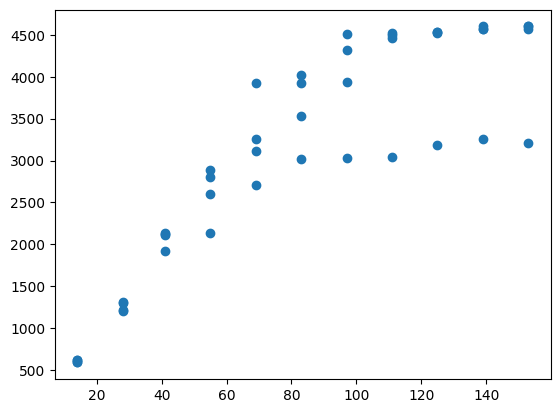

In [ ]:
# Let's make a scatterplot between Temperature and Length_of_fish
plt.scatter(df['Age_of_fish'], df['Length_of_fish'])
plt.show()

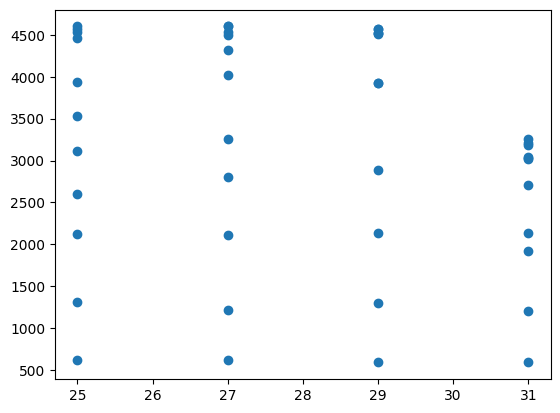

In [ ]:
# Scatterplot of Temperature vs. Length_of_fish
plt.scatter(df['Temperature'], df['Length_of_fish'])
plt.show()

In [ ]:
# Correlation Coefficient Matrix
df.corr()

,Age_of_fish,Temperature,Length_of_fish
Age_of_fish,1.000000e+00,-2.625311e-17,0.879116
Temperature,-2.625311e-17,1.000000e+00,-0.181118
Length_of_fish,8.791157e-01,-1.811180e-01,1.000000


Looking at our plots and the values of our correlation coefficients, we can conclude that some sort of linear relationship exists between the independent variables Age_of_fish, Temperature, and the dependent variable Length_of_fish. $$Corr(X_1, B) = -0.879116 \ne 0, Corr(X_2, B) = -0.181118 \ne 0$$
Interestingly, $$Corr(X_1, X_2) = -2.62*10^{-17} \approx 0 \implies \text{X_1 & X_2 are Independent}$$

Now that we know $X_1$ and $X_2$ are independent, we assume that each value drawn from our fish samples for age and temperature have the same distribution. That is for every value X_i in age, $X_i \sim D_1(x)$, and for every value X_i in temperature $X_i \sim D_2(x)$. This means our distribution is Independent and Identically Distributed, satisfying Assumption 2.

# (3) Using Linear Regression to predict Length_of_Fish
Can the other two variables Age_of_fish ($X_1$) and Temperature ($X_2$) be used to predict Length_of_Fish (B)?

Model function: $B = A_1X_1 + A_2X_2 + A_3$

We want to find $\mathbf{A} = (A_1, A_2, A_3) = [A_1\ A_2\ A_3]^T$ such that our loss function is minimized. Let's use Ordinary Least Squares from statsmodels.api

In [ ]:
# Use Linear Regression to construct a model Length_of_fish = A_1*Temperature + A_2*Age_of_fish using statsmodels.api
import statsmodels.api as sm
X = df[['Age_of_fish', 'Temperature']]
y = df['Length_of_fish']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Length_of_fish   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     84.98
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.61e-15
Time:                        01:08:36   Log-Likelihood:                -342.34
No. Observations:                  44   AIC:                             690.7
Df Residuals:                      41   BIC:                             696.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3904.2660   1149.044      3.398      

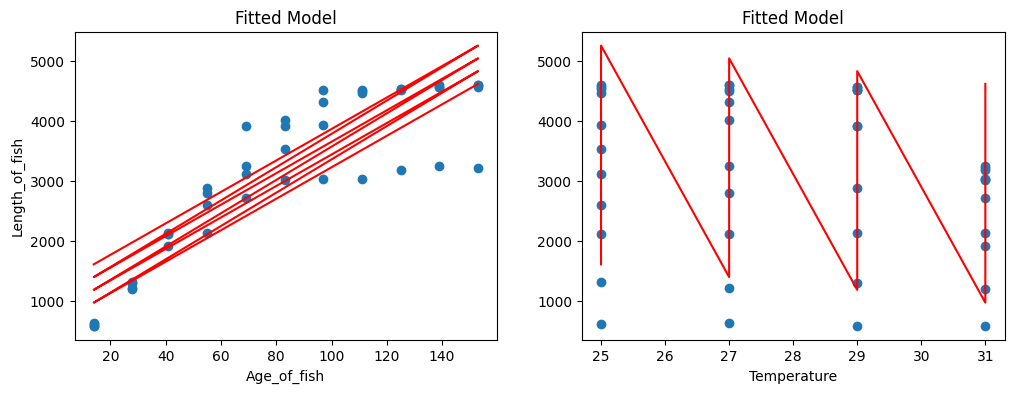

In [ ]:
# Plot fitted model and residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(df['Age_of_fish'], df['Length_of_fish'])
ax[0].plot(df['Age_of_fish'], model.predict(), color='red')
ax[0].set_xlabel('Age_of_fish')
ax[0].set_ylabel('Length_of_fish')
ax[0].set_title('Fitted Model')

ax[1].scatter(df['Temperature'], df['Length_of_fish'])
ax[1].plot(df['Temperature'], model.predict(), color='red')
ax[1].set_xlabel('Temperature')
ax[1].set_title('Fitted Model')

plt.show()

For the first graph, since $\mathbf{X} = (X_1, X_2) = (\text{Age_of_fish}, \text{Temperature})$, the reason there is 4 lines is because Temperature has 4 values. So it's basically graphing $$\text{Length_of_fish} = \hat{f}(\mathbf{X}) = \hat{f}(X_1, 25),\\ \text{Length_of_fish} = \hat{f}(\mathbf{X}) = \hat{f}(X_1, 27),\\ \text{Length_of_fish} = \hat{f}(\mathbf{X}) = \hat{f}(X_1, 29),\\ \text{Length_of_fish} = \hat{f}(\mathbf{X}) = \hat{f}(X_1, 31)$$

Since our model $\hat{f}$ is multilinear, this is actually a surface and not a line, so here is a 3D plot

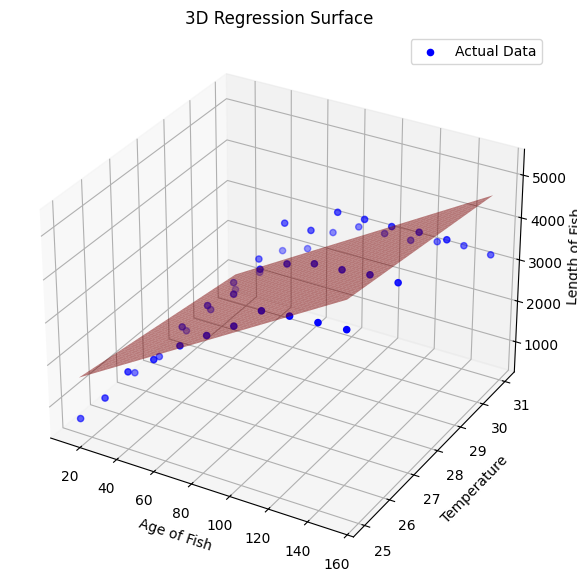

In [ ]:
# Assuming df is your DataFrame and your model is already fitted
# with X including both predictors and a constant term

# Create a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(df['Age_of_fish'], df['Temperature'], df['Length_of_fish'], color='blue', label="Actual Data")

# Create a meshgrid for Age_of_fish and Temperature
age_range = np.linspace(df['Age_of_fish'].min(), df['Age_of_fish'].max(), 30)
temp_range = np.linspace(df['Temperature'].min(), df['Temperature'].max(), 30)
Age_mesh, Temp_mesh = np.meshgrid(age_range, temp_range)

# Flatten meshgrid and create a DataFrame for predictions
X_pred = pd.DataFrame({'Age_of_fish': Age_mesh.ravel(), 'Temperature': Temp_mesh.ravel()})
X_pred = sm.add_constant(X_pred)  # include constant if used in the model

# Predict Length_of_fish over the grid
Length_pred = model.predict(X_pred)
Length_pred = np.array(Length_pred).reshape(Age_mesh.shape)

# Plot the regression plane
ax.plot_surface(Age_mesh, Temp_mesh, Length_pred, color='red', alpha=0.5)

# Labels and title
ax.set_xlabel('Age of Fish')
ax.set_ylabel('Temperature')
ax.set_zlabel('Length of Fish')
ax.set_title('3D Regression Surface')

plt.legend()
plt.show()

# (4) Is our model reasonable? Does it satisfy the assumptions?
We have proven earlier that our model satisfies Assumptions 1 & 2. There's a linear relationship between the independent and dependent variables, and the independent variables are i.i.d. To have a reasonable model, it must satisfy all 4 assumptions. For Assumption 3, we must make sure that our residuals are normally distributed.

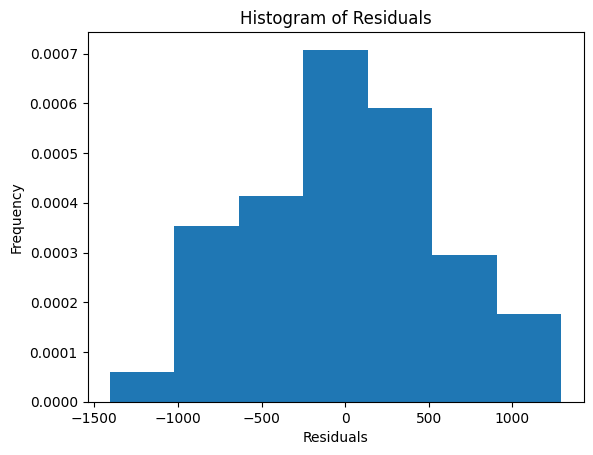

In [ ]:
# Check that the residuals are normally distributed
residuals = model.resid
plt.hist(residuals, bins='auto', density=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

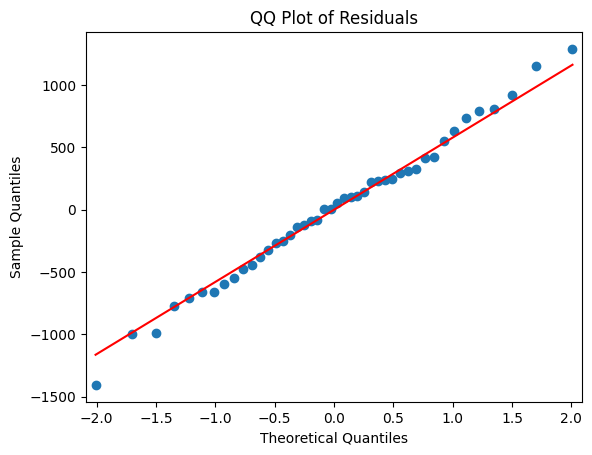

In [ ]:
# Let's try using a qq-plot to visualize this distribution.
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

Our residuals clearly satisfy Assumption 3. Not only does our histogram resemble a normal distribution with a single peak, it is almost completely symmetric. Additionally, the qq-plot demonstrates that its distribution since the plotted residuals are extremely close to the line.

Now for Assumption 4, is our model Homoscedastic? (Meaning the variance of our residuals are consistent across the entire range of data)

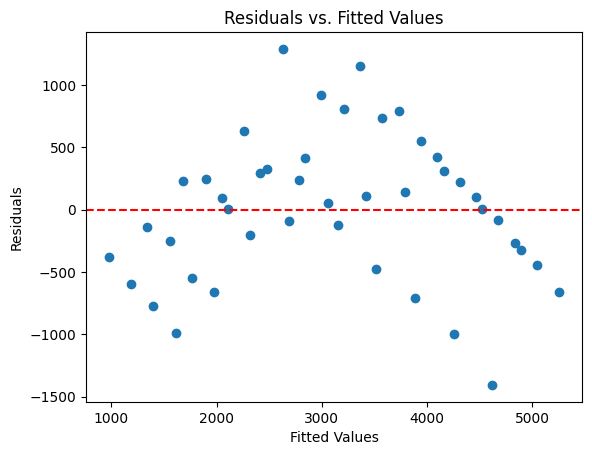

In [ ]:
# Plot residuals vs fitted values
# Add mid line to plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

For this to be homoscedastic, our graph of fitted values vs residuals should look like random noise. This does look extremely random therefore it satisfies Assumption 4 and our model is reasonable.